## Doing Neural Nets from scratch using classification between digits 6 and digits 2 Image Classifier

Deep Learning can be taunting especially with the name and various jargon associated with the field. Today, after reading through [fastai chapter 4 notebook](https://colab.research.google.com/github/fastai/fastbook/blob/master/04_mnist_basics.ipynb) on deep learning taught by Jeremy Howard on YouTube via this [link](https://course.fast.ai/Lessons/lesson3.html) as neural net foundations, I decided to go through the model building from scratch. The data for this project was obtained from Fastai URLs class.

**What are deep learning models?** Deep learning models are functions. Functions that do a specific thing. However, unlike normal functions that does a speicific task as defined by the programmer, deep learning models actually learn from the input itself and gives an output based on the parameters that it has learnt from the input. These parameters (and some other things) are what is stored in a deep learning model when you export it and use it for some sort of predictions. These parameters also called `weights and biases` are usually matrices of numbers that possess an extra function of being adjustable during the training/learning process. 

What I will be trying to do in this notebook will be to explain how neural nets work possibly in an intermediate or high level(less complicated) manner while avoiding as many jargons as possible.

According to fastai chapter 4 notebook, there are seven steps, which I compress to six steps involved in building a neural network (neural net)/ deep learning model (DL model) and they are as follows:
1. Initialize random model parameters
2. Use the model to make prediction.
3. Calculate the loss obtained by comparing the prediction with the actual targets using a selected loss function.
4. Based on the loss function, calculate the gradients for each parameters.
5. Step the parameters using the gradients obtained above.
6. Repeat step 2 to 5 until you obtain desired result or time constraints.

These steps will form the architecture of our entire process and also serves as the foundation of the building deep learning models. Each single step can be thus be made more complicated depending on the interest of the person, the challenge that is faced or other factors. My job here will be to use the simplest tools that I am familiar with while using fastai framework that is built on top of pytorch.

Before we begin delving straight into working with the deep learning. We need a dataset to work with. As explained above the dataset has been obtained from zindi and will thus be used. Since we will be using simple neural networks, some few things are important for the images that we are working with.
1. They should be of the same size and
2. In order to save space and time for many of the matrix computations that we will be doing, we will need to convert our pictures to black and white.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     |████████████████████████████████| 719 kB 4.1 MB/s 
     |████████████████████████████████| 365 kB 37.1 MB/s 
     |████████████████████████████████| 4.9 MB 49.9 MB/s 
     |████████████████████████████████| 1.3 MB 53.9 MB/s 
     |████████████████████████████████| 212 kB 8.1 MB/s 
     |████████████████████████████████| 120 kB 59.5 MB/s 
     |████████████████████████████████| 115 kB 54.2 MB/s 
     |████████████████████████████████| 127 kB 53.2 MB/s 
     |████████████████████████████████| 6.6 MB 43.8 MB/s 


### Gathering Data.

Since the dataset is already downloaded on my drive, I will thus proceed to load the dataset and divide it into a traing and validation set.

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
print((path/"training").ls().sorted()[:7])
print((path/"testing").ls().sorted()[:7])
#Select the first two objects in the list which are directories for images 2 and images 6

[Path('/root/.fastai/data/mnist_png/training/0'), Path('/root/.fastai/data/mnist_png/training/1'), Path('/root/.fastai/data/mnist_png/training/2'), Path('/root/.fastai/data/mnist_png/training/3'), Path('/root/.fastai/data/mnist_png/training/4'), Path('/root/.fastai/data/mnist_png/training/5'), Path('/root/.fastai/data/mnist_png/training/6')]
[Path('/root/.fastai/data/mnist_png/testing/0'), Path('/root/.fastai/data/mnist_png/testing/1'), Path('/root/.fastai/data/mnist_png/testing/2'), Path('/root/.fastai/data/mnist_png/testing/3'), Path('/root/.fastai/data/mnist_png/testing/4'), Path('/root/.fastai/data/mnist_png/testing/5'), Path('/root/.fastai/data/mnist_png/testing/6')]


In [5]:
train_dir = (path/"training").ls().sorted()[:7] #Subset to extract 6 and 2 images
valid_dir = (path/"testing").ls().sorted()[:7]

In [6]:
six_images = train_dir[-1].ls() #obtain files in `six` images
two_images = train_dir[2].ls()  #obtain files in `two` images

In [7]:
six_valid = valid_dir[-1].ls()
two_valid = valid_dir[2].ls()

We already obtained the images data that we need to classify if an image is a 6 or a 2. The images need to be in the form of a dataset where the independent variable is a **vector** of each image and the dependent variable(our target) is label as "6" or "2".

The kind of images that we are dealing with are black and white kind of images that can be represented as 2D arrays as we will see below.

We procced to obtain vectors of each image and then join both six and two images to form our training set. The labels are also obtained and a dataset kind of object is formed by zipping both independent and dependent variables together. Talking about dependent variables, we will asssign `6` with 1 and `2` with 0. I.e. thse model will call true(1) when it is 6 and will call false when it is 2

The same applies for the validation data

In [8]:
print("Shape of a typical image 6 is:", tensor(Image.open(six_images[0])).shape)
print("Shape of a typical image 2 is:", tensor(Image.open(two_images[0])).shape)

Shape of a typical image 6 is: torch.Size([28, 28])
Shape of a typical image 2 is: torch.Size([28, 28])


In [9]:
#Random opening of images
Image.open(two_images[5])

In [10]:
Image.open(six_images[5])

In [11]:
torch.stack([tensor(Image.open(six_images[0])).view(-1, 28*28),
             tensor(Image.open(six_images[1])).view(-1, 28*28)]).squeeze(1).shape

torch.Size([2, 784])

In [12]:
six_vectors = (torch.stack([tensor(Image.open(i))
.view(-1, 28*28) for i in six_images])
.squeeze(1)).float()/255

six_vectors.shape

torch.Size([5918, 784])

In [13]:
two_vectors = (torch.stack([tensor(Image.open(i))
.view(-1, 28*28) for i in two_images])
.squeeze(1)).float()/255


two_vectors.shape

torch.Size([5958, 784])

In [14]:
#Create six and two valid

six_valid_vectors = (torch.stack([tensor(Image.open(i))
.view(-1, 28*28) for i in six_valid])
.squeeze(1)).float()/255

six_valid_vectors.shape

torch.Size([958, 784])

In [15]:
two_valid_vectors = (torch.stack([tensor(Image.open(i))
.view(-1, 28*28) for i in two_valid])
.squeeze(1)).float()/255

two_valid_vectors.shape

torch.Size([1032, 784])

What the result of the above is showing us that each of the vectors contain a vector of each image. Vectors are 1D matrices. They have just one row. A list for instance can be called a vector because they contain their values in 1D.

Let us pick a random vector in both vector stack and convert it back to a matrix of 28by28 and then show it as an image, to see if our transformation still matches.

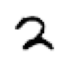

In [16]:
show_image(two_vectors[189, :].view(28, 28));

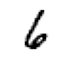

In [17]:
show_image(six_vectors[1900, :].view(28, 28));

In [18]:
#Obtain train data and targets that combine both stacks
two_target = L([0] * len(two_images))
six_target = L([1] * len(six_images))

train_target = two_target + six_target
train_target[:10]

(#10) [0,0,0,0,0,0,0,0,0,0]

In [19]:
len(six_valid)

958

In [20]:
#Obtain valid data and targets that combine both stacks

two_valid_targets = L([0] * len(two_valid))
six_valid_targets = L([1] * len(six_valid))

valid_target = two_valid_targets + six_valid_targets
valid_target[:10]

(#10) [0,0,0,0,0,0,0,0,0,0]

In [21]:
train_target[-6266:]

(#6266) [0,0,0,0,0,0,0,0,0,0...]

In [22]:
train_data = two_images + six_images

train_vectors = (torch.stack([tensor(Image.open(i))
.view(-1, 28*28) for i in train_data])
.squeeze(1)).float()/255
train_vectors.shape

torch.Size([11876, 784])

In [23]:
train_vectors.shape[1]

784

In [24]:
#Valid datapoints

valid_data = two_valid + six_valid

valid_vectors = (torch.stack([tensor(Image.open(i))
.view(-1, 28*28) for i in valid_data])
.squeeze(1)).float()/255

valid_vectors.shape

torch.Size([1990, 784])

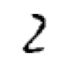

In [25]:
#test the first and lastn set of vectors
show_image(train_vectors[20, :].view(28, 28));

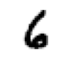

In [26]:
show_image(train_vectors[-10, :].view(28, 28));

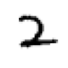

In [27]:
#Show image for valid dataset
show_image(valid_vectors[10, :].view(28, 28));

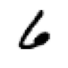

In [28]:
#Show image for valid dataset
show_image(valid_vectors[-10, :].view(28, 28));

In [29]:
#Convert train_target to 2D array for proper zipping

train_target_t = tensor(train_target).unsqueeze(1)
train_target_t.shape

torch.Size([11876, 1])

In [30]:
#Convert valid target to 2D array

valid_target_t = tensor(valid_target).unsqueeze(1)
valid_target_t.shape

torch.Size([1990, 1])

In [31]:
#Zip both values of data and target of training set into a dataset

train_dset = list(zip(train_vectors, train_target))
train_dset[0][0].shape, train_dset[0][1]
#This will be useful when we want to use a dataloader

(torch.Size([784]), 0)

In [32]:
#Zip both values of target into a dataset

valid_dset = list(zip(valid_vectors, valid_target))
valid_dset[0][0].shape, valid_dset[0][1]
#This will be useful when we want to use a dataloader

(torch.Size([784]), 0)

#### Initialize Parameter

Paramter refers to the weights that is used to multiply each pixel value that is represented in the picture and as a vector in train data. One more thing however about parameters is that for each weight designed, a bias should be added. Following the simple linear function equation $$ y = mx + b $$

where b is the bias, the intercept.
To do all of this, we will be defining a class but trying out the functions outside of the class. To initialize some weights, we randomly generate the values and apply the require_grads method of pytorch to tell the computer that for any function this parameters are used and the `backward propagation` of the function is called, we would need our processor to calculate the gradients of these parameters with respect to such function.

In [38]:
#init_param
torch.seed=42
def init_param(shape):
  return torch.randn(shape, 1).requires_grad_(), torch.randn(1).requires_grad_()
paramm = init_param(train_vectors.shape[1])

In [34]:
class neural_net:
  def __init__(self, train_vecs):
    self.train_vecs = train_vecs #which is the training vectors
  def initialize_params(self):
    self.weight = torch.randn(self.train_vecs.shape[1], 1).requires_grad_()
    self.bias = torch.randn(1).requires_grad_()
    return self.weight, self.bias

In [35]:
nnet = neural_net(train_vectors)
wt, bi = nn.initialize_params()

print(wt.shape)
print(" ")
wt[:5], bi #Note the grad_fn information at the outputs

torch.Size([784, 1])
 


(tensor([[0.0169],
         [0.0803],
         [0.7448],
         [1.3455],
         [0.1268]], grad_fn=<SliceBackward0>),
 tensor([1.0122], requires_grad=True))

### Make Predictions

Next is to use the weights to make predictions using matrix multiplication

In [43]:
#Define function to make predictions

def make_preds(xb): return xb@weights + bias

In [41]:
#Initialize the weight and bias
weights, bias = paramm

weights.shape, bias

(torch.Size([784, 1]), tensor([-0.6236], requires_grad=True))

In [46]:
preds = make_preds(train_vectors)
preds

tensor([[-0.1632],
        [ 0.9474],
        [ 4.0635],
        ...,
        [12.1747],
        [-8.7102],
        [-3.1788]], grad_fn=<AddBackward0>)

In [36]:
#Add function make_preds to the class we are trying to build

class neural_net:
  def __init__(self, train_vecs):
    self.train_vecs = train_vecs #which is the training vectors
  def initialize_params(self):
    self.weight = torch.randn(self.train_vecs.shape[1], 1).requires_grad_()
    self.bias = torch.randn(1).requires_grad_()
    return self.weight, self.bias
  def make_preds(self):
    self.raw_predictions = self.train_vecs@self.weight + self.bias
    return self.raw_predictions

In [47]:
#Test prediction method to work for class
nets = neural_net(train_vectors)
nets.initialize_params()
preds_class=nets.make_preds()
preds_class

tensor([[-3.3724],
        [ 8.3267],
        [ 0.1342],
        ...,
        [22.3979],
        [15.0937],
        [18.9928]], grad_fn=<AddBackward0>)

### Calculating loss functions and metrics

Since these weights were randomly initiated, we expect that the answers would be also random and be meaningless especially at the first try. Because of this we will be needing a function that can help us compare our prediction against the actual target and tells us how far we are from our result. The natural choice to go to when dealing with a classifcation problem like this is to use accuracy, which measures how accurate the prediction made is. The next section leads us to `calculating loss functions and metrics`

In [48]:
def accurate(pred, targets):
  acc = (preds>0.0).float() == targets
  return acc.float().mean()

In [49]:
accurate(preds, train_target_t)

tensor(0.4789)

This function that seeks to measure accuracy, makes use that predictions that are negative(less than 0) are False(0, which represents the digit 2 in our data design) and predictions that are positive(greater than 0) are True(1, which represents our digit 6). 

This True or False value converted to numbers(floats) are then compared to the actual targets and we obtain a 0.544 accuracy, whic states that the model is about 54% correct (Might vary depending on the value initiated for our weights and bias by the initiating parameter). 
However, there is a slight problem with using accuracy as a loss function. One important thing when choosing a good loss function is that the function is smooth over time.

In simple terms, a little change in the independent variable (The parmeters - Weight and Bias) should lead to a (little)change in  the dependent variable (The loss). This simple narrative is the principle that gradients and calculating gradients hinges upon. And calculating the gradients of the loss function(dependent variable) with respect to the parameters(weights and biases) is the principle upon which `backpropagation` hinges.

In the case of accuracy, this is not so because accuracy as the loss function is either 0 or 1 and not in between, and for most part of let's say a particular weight, the accuracy will be (0 or 1, but let us say 0) 0 and whether the particular weight is increasing or decreasing, the accuracy will remain unchanged until it gets an exact value that allows it to jump from 0 to 1. This jump which is caused by a small change in the weight (for instance 0.0001, in mathematical terms, as the number tends to zero), allows the gradient to be calculated as 1/0.0001 which as the number tends to zero, so also does the gradient tend to infinity. This large jumps in the gradient of using accuracy as a loss function is not useful for stepping the weights when needed, see demonstration of the above below.

In [51]:
preds

tensor([[-0.1632],
        [ 0.9474],
        [ 4.0635],
        ...,
        [12.1747],
        [-8.7102],
        [-3.1788]], grad_fn=<AddBackward0>)

In [61]:
#Accuracy before we alter a given weight
acc1 = accurate(preds, train_target_t).item()
acc1

0.4788649380207062

In [53]:
#A particular weight that has not been changed yet
weights[320]

tensor([-0.0328], grad_fn=<SelectBackward0>)

In [57]:
#Changing the given weight above

with torch.no_grad(): weights[320] *= 1.01

In [58]:
#Weights changed and altered
weights[320]

tensor([-0.0331], grad_fn=<SelectBackward0>)

We see that a particular weight has been changed and should change the resulting predictions that should change the loss function but would not.

**Note:** The with torch.no_grad() is to inform the computer not to calculated a gradient for the particular function performed on the parameter.

In [62]:
predictions1 = make_preds(train_vectors)
acc2 = accurate(predictions1, train_target_t).item()
acc2

0.4788649380207062

In [63]:
#Test to see acc1 and acc2 are same -- Result: True
acc1 == acc2

True

####Loss function, Gradient Descent and Sigmoid Function.

From what we see above, we know already that accuracy would not serve as a good loss function because for most part of a given weight, the `gradient of the loss function` with respect to (w.r.t) a particular weight will be zero and at the peak of change, it will be infinity. This will not be useful to step our weights.

In order to deal with this, imagine the following:
1. Our prediction is between 0 and 1.
2. For any confident prediction in the right direction, our model is not penalized so much, but for any confident prediction in the wrong direection, our model is largely penalized. 

It so happens that these two conditions can be implemented through pytorch.
The first condition can be implemented through a function called sigmoid. Sigmoid fits any values from negative infinity to positive infinity to be in between 0 and 1. The formula for this is given as:

$$ S(x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$ 

The second condition works the following ways, since our model can now make a prediction between 0 and 1 with any float in between, we can the penalize any confident that goes in the wrong direction

For example, if our model makes a prediction as 0 and the actual is 0, the penalty for such prediction should be 0 but if the actual is 1, the penalty for such confident misinterpretation should 1.0. If it is 0.6 for instance and the actual target is 1.0, the penalty should be 0.4 and so on. . .

This means a large loss means a poor model and a small loss means a great model with small penalty attched to it.

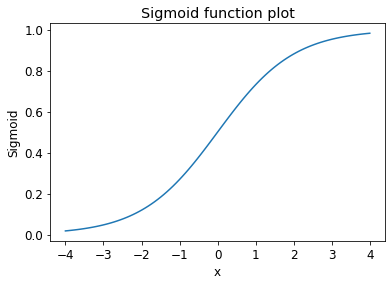

In [64]:
plot_function(torch.sigmoid,
              title="Sigmoid function plot",
              tx="x", ty="Sigmoid",
              min=-4, max=4);

In [232]:
#Redefine class once again, and add loss function
class neural_net:
  def __init__(self, train_vecs, target_vecs):
    self.train_vecs = train_vecs #which is the training vectors
    self.target_vecs = target_vecs
  def initialize_params(self):
    self.weight = torch.randn(self.train_vecs.shape[1], 1).requires_grad_()
    self.bias = torch.randn(1).requires_grad_()
    return self.weight, self.bias
  def make_preds(self):
    self.initialize_params()
    self.raw_predictions = self.train_vecs@self.weight + self.bias
    return self.raw_predictions
  def loss_func(self):
    self.make_preds()
    self.predictions = self.raw_predictions.sigmoid()
    loss=torch.where(self.target_vecs==1, 1-self.predictions, self.predictions).mean()
    return loss

In [233]:
neural_net(train_vectors, train_target_t).loss_func()

tensor(0.3141, grad_fn=<MeanBackward0>)

In [68]:
#Define function outside the class for implementation
def loss_func(pred, target):
  pred = pred.sigmoid()    #1st condition, sigmoid function
  return torch.where(target==1, 1-pred, pred).mean()   #Second condition
sig_loss1 = loss_func(predictions1, train_target_t).item()
sig_loss1

0.523318350315094

In [69]:
#Lets us change something in the weights as above to spot any change
weights[320]

tensor([-0.0331], grad_fn=<SelectBackward0>)

P:S - There is a difference between the class output on the loss function largely due to multiple calling of some random parameters.

In [74]:
#CAlter weights
with torch.no_grad(): weights[320] *= 0.991

In [75]:
#ltered weigghts
weights[320]

tensor([-0.0328], grad_fn=<SelectBackward0>)

In [77]:
predictions2 = make_preds(train_vectors)
sig_loss2 = loss_func(predictions2, train_target_t)
sig_loss2.item()

0.5233126878738403

In [79]:
#The loss has responed to the same level of change as with previous accuracy loss function
#Test if the losses are the same
(sig_loss1 == sig_loss2).item()

False

Yeah! As predicted, there is a difference in the loss function result when the parameter slightly changed. The loss function however is a mathematical formula that is useful for stepping the weights in neural networks but not for really understanding how well the model is making a good prediction. Thus we will be adding the accurate function that returns how accurate the prediction we are making is.

In [80]:
def accurate(pred, targets, threshold=0.5):
  acc = (preds>threshold).float() == targets
  return acc.float().mean()

In [81]:
accurate(predictions2, train_target_t)

tensor(0.4750)

**Where the magic happens.** We can obtain gradient of the loss function w.r.t each parameter. This obtained information used to step the weights in the direction to minimize the loss function. For better understanding of this, you can assume that loss function is a quadratic function with a single paramter x, in DL we will need a value of x that minimizes as much as possible the loss function on the parabolic curve. The mathematical and computer way to do this is to determine the gradient of the function at point x and use that to step the weights in the direction of the gradient while avoiding overshooting the minima.

In [82]:
#Call loss.backwards()
sig_loss2.backward()
#This method calls populates the weights and bias with the
#.grad(gradients) attribute, remember `.requires_grad_()`?

In [83]:
weights.grad[200:220, :]

tensor([[ 0.0003],
        [ 0.0008],
        [ 0.0017],
        [ 0.0026],
        [ 0.0031],
        [ 0.0037],
        [ 0.0039],
        [ 0.0024],
        [-0.0004],
        [-0.0036],
        [-0.0047],
        [-0.0022],
        [ 0.0027],
        [ 0.0076],
        [ 0.0097],
        [ 0.0087],
        [ 0.0065],
        [ 0.0043],
        [ 0.0019],
        [ 0.0004]])

In [84]:
bias.grad

tensor([-0.0039])

In [85]:
weights.grad.shape

torch.Size([784, 1])

In [86]:
#Add accuracy function to class
class neural_net:
  def __init__(self, train_vecs, target_vecs):
    self.train_vecs = train_vecs #which is the training vectors
    self.target_vecs = target_vecs
  def initialize_params(self):
    self.weight = torch.randn(self.train_vecs.shape[1], 1).requires_grad_()
    self.bias = torch.randn(1).requires_grad_()
    return self.weight, self.bias
  def make_preds(self):
    self.initialize_params()
    self.raw_predictions = self.train_vecs@self.weight + self.bias
    return self.raw_predictions
  def loss_func(self):
    self.make_preds()
    self.predictions = self.raw_predictions.sigmoid()
    loss=torch.where(self.target_vecs==1, 1-self.predictions, self.predictions).mean()
    return loss
  def accurate(self, threshold=0.5):
    self.make_preds()
    acc_pred = self.raw_predictions.sigmoid()
    acc_= (acc_pred>threshold).float() == self.target_vecs
    return acc_.float().mean()

In [88]:
test_net = neural_net(train_vectors, train_target_t)
test_net.accurate()

tensor(0.4761)

We see that the weights.grad attribute gives an output of the shape of the number of parameters that that we insantiated. i.e. every weight has a gradient value w.r.t the loss function. This gradient essentially gives us an information, which is the direction of the function to minimize the loss. We will be considering this in the next section but before that, we can see how this basically would work. Since the gradient shows the change that would happen(change in loss function) if there is a unit change in x and not the unit change, we must gradually step it down, so that we don't fly over the minima and bounce around. We also would like to choose a factor that would multiply the change(gradient) such that we arrive faster at a minima. This deciding factor is often left in the hands of DL practictioners to determine (as a hyperparameter). For this, we would just choose 0.0001. This factor is called the learning rate(lr)

In [96]:
lr = 0.0001
epochs = 4
loss = tensor(np.nan)
for i in range(epochs):
  print("Mean Parameter{}".format(i+1), weights.mean().item()), print("Bias{}".format(i+1), bias.item()), print("loss{}".format(i+1), loss.item()), print(" "),
  pred = make_preds(train_vectors)
  loss = loss_func(pred, train_target_t)
  loss.backward()
  with torch.no_grad():
    weights -= lr*weights.grad
    weights.grad.zero_(); 
  with torch.no_grad():
    bias -= lr*bias.grad
    bias.grad.zero_();
  #Using torch.no_grad(), helps us to calculate the the param IN PLACE but also asking that the gradient is not tracked.
  #To avoid gradient accumulation, we use the .grad.zero_() over each epoch

Mean Parameter1 0.01053717453032732
Bias1 -0.6236460208892822
loss1 nan
 
Mean Parameter2 0.010537194088101387
Bias2 -0.6236456036567688
loss2 0.5233010053634644
 
Mean Parameter3 0.01053721085190773
Bias3 -0.6236451864242554
loss3 0.5232996940612793
 
Mean Parameter4 0.010537231341004372
Bias4 -0.6236447691917419
loss4 0.5232986211776733
 


We see that our loss is reducing as our weights and biases are being adjusted by their gradients (the direction) and learning rate (magnitude).

**Note to future self** In using pytorch and during initiating and updating the weights parameter, take note to use inplace operation `(i.e. a -= b)` and not out of place operators like `a = a + b`. For more information, check out this [link](https://medium.com/@mrityu.jha/understanding-the-grad-of-autograd-fc8d266fd6cf)

### Stepping Weights: Stochastic Gradient Descent and Minibatches. (Combining all the steps together)

We already have a sense of how stochasstic gradient descent works and how it is used to step down our respective weights. In deep learning however, weights are not adjusted epoch by epoch (number of trainings). They are adjusted in minibatches.

While our dataset that we are using is 28 by 28 greyscale image, we often deal with higher dimension of images (3-channel images like RGB images) with higher sizes that compressing it to say 28by28 image will make it loose the image distinguishing features. For instance, in the model I deployed to hugging face that identified a zebra from an elephant, had images that were pixel sizes greater than 300 and it was colured (3 dimensiions). This means that our image training vector will be more complicated than this and subsequently the neural net that we create.

In order to solve this complexity (time) and some other advantages that I will highlight, data(for instance images) are passed in through the model in minibatches. `Batch size` refers to the number of data points that you want to use at a particular time through the model. 

Take for instance, our model will be using 6,000 images for training and during training, we assign that we will be training the model for 5 epochs and batch size of 500 (Although I doubt DL practictioners will use that number or such round number, you might rather find something like 256 or 512, I don't know why yet). So, what happens is that during epoch 1, we choose 500 data points from the pool of the 6,000 datapoints, make predictions, calculate loss function and metrics, adjust the weights, reset the gradients and go on to another set of 500 datapoints. We only finish epoch 1  when the 6,000 datapoints have been used to train the model(That will be about 12 times during epoch 1). We do this for epoch 2, 3, 4 and 5. And the result obtained is recorded.

Note that in our outputs, we will only see one loss and metric and other outputs values for each epoch and not for each minibatch. Usually, the loss function and metrics are averaged accross the mini-batches in one epoch.

In choosing a batch size, a hyperparameter also, when you choose a low batch size(bs) e.g 1, which means the whole dataset per training, then the following happens;
1. Your training time is slow and more complicated
2. You get to change your parameters only by the number of epochs you have chosen, since you have just 1 batch size per epoch. This is the reason, coneventionally you have to double your learning rate(lr) when you double your batch size (bs). A small batch size means a lot of times to change your parameters,(Although there is a great tendency to get stuck in a local minima), so using a small lr will gradually allow you get to your minima but when you increase the bs, you have lesser number of trainings (& noise trainings) to perform and that small lr might not get you to the minima, so incresing the lr will compensate for the reduced number of training. Read this [article ](https://medium.com/geekculture/how-does-batch-size-impact-your-model-learning-2dd34d9fb1fa) if you want to know more 
3. Your metrics, gradients and loss are more stable accross each training epoch. In an epoch, you have just one value for your outputs, this means your standard deviation accross your output(s) is null(zero). If you have two bs for instance, the mean of two "not equal" outputs are averaged and displayed, since the datapoints for each mini batch is different, so will be the losses and the gradients.

However, when you choose a high batch size(bs) e.g 6000, which means one single data point per training, then the following happens;

1. If you don't get a GPU `out of memory error`, more like CUDA `out of memory error`, then the process can be parallelized on GPUs and training time subsequently shorter.
2. You get to change your parameters 6000 times per epoch, which means you get to adjust your parameters 6,000 * 5 times (30,000 times), where 5 is the number of epochs that you have chosen.
3. Number 2 obviously has a downside to it which is that our gradients are very volatile and a high possibility of divergence from the loss minima possible. Also our outputs will be quite unstable, with 6000 outputs being averaged per epochs, which suggests most likely high standard deviation as different images will have different different features. This results into an example of overfitting, with high variance, because our model becomes too sensitive to each data point and data distribution of our data points, which makes the model loose it's generalization ability.

In order to use minibatches, I will be using fastai's DataLoader class and the datasets that I created initially, I will also create te valid dataset.

In [99]:
#hyperparamaters instantiation
bs = 256

In [101]:
train_dl = DataLoader(train_dset, batch_size=bs)
xb, yb = first(train_dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256]))

In [102]:
#Put valid dset into data loader too
valid_dl = DataLoader(valid_dset, batch_size=bs)
xv, yv = first(valid_dl)
xv.shape, yv.shape

(torch.Size([256, 784]), torch.Size([256]))

In [103]:
#Let us define a test_batch from the training set that we will use to try out each step we might want to try
batch_x = train_vectors[:7]
batch_y = train_target_t[:7]

In [140]:
#step 1 -- initiate parameter
weights, bias = init_param(xb.shape[1])
weights.shape, bias

(torch.Size([784, 1]), tensor([-1.1861], requires_grad=True))

In [109]:
#make predictions -- using raw weights and bias before trying function to see that our result is working well
batch_x@weights + bias

tensor([[11.5014],
        [-1.6144],
        [-4.9224],
        [ 4.4609],
        [-8.7745],
        [-6.2469],
        [ 9.8588]], grad_fn=<AddBackward0>)

In [110]:
#Try function that we created
make_preds(batch_x) #Step 2

tensor([[11.5014],
        [-1.6144],
        [-4.9224],
        [ 4.4609],
        [-8.7745],
        [-6.2469],
        [ 9.8588]], grad_fn=<AddBackward0>)

We are right on track!

In [112]:
#Loss function that takes raw predictions and obtains a result
loss_func(make_preds(batch_x), batch_y) #Step 3

tensor(0.4520, grad_fn=<MeanBackward0>)

In [191]:
#Step 4: calculate gradients
def calc_grad(x, y, model):
  pred = model(x)
  loss = loss_func(pred, y)
  #calcluate grad with loss.backward()
  loss.backward()
#Function combines step 1 to step 4

In [115]:
#Test on batch_x
calc_grad(batch_x, batch_y, make_preds)

weights.grad.mean(), bias.grad

(tensor(0.0034), tensor([0.0454]))

In [116]:
#second call on calc_grad(loss.backward)
calc_grad(batch_x, batch_y, make_preds)

weights.grad.mean(), bias.grad

(tensor(0.0052), tensor([0.0682]))

Remember when I talked about using `weights.grad.zero_()` to zero our gradients, it turns out that when we call loss.backward as in the calc_grad function that we used above, the gradient accumulates in the .grad attribute, thus when we are done stepping our weights, it is important that we that we zero our gradients.

In [121]:
#zero grad before calling loss.backward
weights.grad.zero_()
bias.grad.zero_()

#Print weight and bias grad
print("Result of zeroing the grads")
print(weights.grad.mean(), bias.grad)
print(" ")

#Calc calc_grad
calc_grad(batch_x, batch_y, make_preds)

#print the grad
print("Gradients without accumulation")
weights.grad.mean(), bias.grad

Result of zeroing the grads
tensor(0.) tensor([0.])
 
Gradients without accumulation


(tensor(0.0017), tensor([0.0227]))

While the loss function returns a smooth function that can be used to iterate over our model and improve the model, the best way to examine the model is to view a metric that is understandable by humans, for classification, it is accuracy, that tells us how well our model is performing. And this is performed over the validation set.

In [122]:
#Define function that takes the raw predictions and compares it against a 
#threshold to determine accuracy

def accurate(pred, targets, threshold=0.5):
  preds = pred.sigmoid()
  acc = (preds>threshold).float() == targets
  return acc.float().mean()

This function is going to be able to calculate the accuracy for each batch of validation set when testing each intermediate model(i.e. final model at the end of each epoch). To calculate the  average accuracy accross the validation set for each epoch, we will need another function that uses the accurate function above.

In [134]:
def validate_epoch(model):
  batches_accuracy = torch.stack([accurate((model(xb)), yb) for xb, yb in valid_dl])
  return round(batches_accuracy.mean().item(), 4)

In [145]:
params = weights, bias
lr = 1.

In [155]:
#Define function that trains model in one epoch (i.e.) step weights per minibatch in a single epoch
def train_epoch(model, lr, params):
  for xb, yb in train_dl:
    calc_grad(xb, yb, model)
    #Update weights and biases
    for p in params:
      with torch.no_grad():
        p -= p.grad * lr
        p.grad.zero_()

In [146]:
#Train epoch and validate epoch in a single epoch

train_epoch(make_preds, lr=lr, params=params)
print(validate_epoch(make_preds))

0.9007


In [147]:
#Let us repreat this for a couple of times (number of epochs)

for i in range(10):
  train_epoch(make_preds, lr=lr, params=params)
  print(validate_epoch(make_preds), end=" ")

0.9012 0.9022 0.9022 0.9026 0.9026 0.9026 0.9031 0.9031 0.9031 0.9031 

In [148]:
#Let us repreat this for a couple of times more (number of epochs)

for i in range(10):
  train_epoch(make_preds, lr=lr, params=params)
  print(validate_epoch(make_preds), end=" ")

0.9031 0.9043 0.9049 0.9049 0.9049 0.9049 0.9054 0.9054 0.9054 0.9054 

In [149]:
#Let us repreat this for a couple of times more (number of epochs)

for i in range(10):
  train_epoch(make_preds, lr=lr, params=params)
  print(validate_epoch(make_preds), end=" ")

0.9054 0.9059 0.9059 0.9063 0.9063 0.9063 0.9063 0.9063 0.9063 0.9068 

In [163]:
#Let us repreat this for a couple of times more (number of epochs) -- multiple reuns

for i in range(20):
  train_epoch(make_preds, lr=lr, params=params)
  print(validate_epoch(make_preds), end=" ")

0.9325 0.9325 0.9325 0.9325 0.9325 0.9325 0.9325 0.933 0.933 0.9335 0.9335 0.9335 0.9335 0.9335 0.9335 0.934 0.934 0.934 0.934 0.934 

How do we know when to stop? We stop mostly on two basis, time constraints and before the validation metrics begins to get worse. For instance, it looks as if my current model cannot perform better than 0.9651 (which is 96.5%) and even dropped to 0.9647.
(This has changed due to certain reruns and random initiation)

And that is the basic idea behind how one deep learning layer. But using fastai already made class and pytorch classes to make a more complex kind of model. A "deeper" layer.

### The nn.linear class

This class can perform step 1 and step 2 of our processes together, i.e. initiating parameters and using the parameters to make prdictions.


In [173]:
nn.Linear(28*28, 1)

Linear(in_features=784, out_features=1, bias=True)

In [174]:
linear_model = nn.Linear(28*28, 1)

In [175]:
#This class has parameters class that prints both the weights and bias together

weights, bias = linear_model.parameters()
weights.shape, bias

(torch.Size([1, 784]), Parameter containing:
 tensor([0.0086], requires_grad=True))

In [182]:
#Test on batch_x
linear_model(batch_x)

tensor([[ 0.1530],
        [ 0.0823],
        [-0.0448],
        [ 0.1741],
        [-0.3034],
        [-0.0041],
        [-0.1536]], grad_fn=<AddmmBackward0>)

### Optimizer Class

It turns out that stepping down weights (paramters) with their respective gradients can also be automated by a class called `SGD`, (mathematically known as Stochastic gradient descent) by giving it the parameters and the learning rate.

In [185]:
opt = SGD(linear_model.parameters(), lr)

In [189]:
#Let us redefine training an epoch
def train_epoch(model):
  for xb, yb in train_dl:
    calc_grad(xb, yb, model) #remember this performs from step 1 to calculate gradients
    opt.step()
    opt.zero_grad()

In [192]:
#Let us train a single epoch and calculate the validate_epoch
train_epoch(linear_model)
print(validate_epoch(linear_model))

0.5039


In [194]:
#Define train model that train model for a number of epochs

def train_model(model, epochs):
  for _ in range(epochs):
    train_epoch(model)
    print(validate_epoch(model))

In [195]:
train_model(linear_model, 20)

0.5039
0.5039
0.5039
0.5039
0.5039
0.5039
0.5039
0.5039
0.5039
0.5039
0.4995
0.583
0.7208
0.8127
0.8645
0.8885
0.907
0.9182
0.9261
0.9334


In [196]:
#Train for some more time
train_model(linear_model, 4)

0.9373
0.9427
0.9481
0.951


In [197]:
#Train for some more time
train_model(linear_model, 10)

0.9529
0.9544
0.9559
0.9578
0.9593
0.9602
0.9602
0.9617
0.9622
0.9627


This classes and ready made class initiation can thus be used with fastai `Learner` Class

In [203]:
dls = DataLoaders(train_dl, valid_dl)

In [207]:
learn = Learner(dls, nn.Linear(28*28, 1), loss_func=loss_func,
        opt_func=SGD metrics=accurate)

In [210]:
learn.fit(20, lr)

epoch,train_loss,valid_loss,accurate,time
0,0.619782,0.479820,0.518593,00:00
1,0.368863,0.483677,0.485427,00:00
2,0.168681,0.373582,0.600597,00:00
3,0.088863,0.269475,0.734328,00:00
4,0.055938,0.190396,0.824372,00:00
5,0.041622,0.147260,0.871106,00:00
6,0.035190,0.122131,0.891237,00:00
7,0.032148,0.105664,0.906313,00:00
8,0.030580,0.094019,0.916363,00:00
9,0.029632,0.085311,0.923932,00:00


So a basic idea is that parameters instantiation(it lies in architecture instantiation) and parameter control (i.e. calculating/instantiating gradients(not loss) i.e. param.grad, stepping the parameters by its gradients, zeroing the gradients and using them to make raw predictions) can all be fully automated, whereas the loss function(that is used to calculate the gradients), the metric and some other information can be less automated and depend on our choice.

Note: Fully automated does not mean it can not be altered, just means that it can be best left as a low level process.

### Training Deeper Layers

We already know that the model making the prediction is a simple linear equation (in case of make_preds and linear_model). They are both matrix multiplication that uses the simple linear equation of:

$$ y = mx_1 + b $$

If we add more layers, say
$$ y = mx_2 + b $$

 Where $x_2$ is the output from layer 1, the final result that we will obtain turns out to still be a linear equation of some sort (that will have used only $x_1$). In order to make each layer perform a better work and sort of independednt work, the equation needs to be disjointed, so that each layer can contribute in significant ways to the model. From this problem came the solution called `Rectified Linear Units` a.k.a ReLU.

 What ReLu does is very simple. It takes a value and if the value is less than 0, it converts it to 0. So in a matrix output for instance all negative numbers are converted to 0. This applied to all matrix output except for the final output.

In [218]:
#See the result of y
y = torch.randn(10)
y

tensor([-0.5728,  0.6545,  0.3371,  1.3475,  0.0863,  0.8933,  1.1834,  0.6913, -0.7166,  0.3890])

In [219]:
#Apply ReLu to y
F.relu(y)

tensor([0.0000, 0.6545, 0.3371, 1.3475, 0.0863, 0.8933, 1.1834, 0.6913, 0.0000, 0.3890])

In [222]:
#Develop a three layer neural net architecture

simple_net = nn.Sequential(
    nn.Linear(28*28, 40),
    nn.ReLU(),
    nn.Linear(40, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

In [224]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=loss_func, metrics=accurate)

In [225]:
learn.fit(20, lr)

epoch,train_loss,valid_loss,accurate,time
0,0.445198,0.516468,0.481407,00:00
1,0.266118,0.503168,0.485427,00:00
2,0.135306,0.350189,0.650879,00:00
3,0.071045,0.237844,0.765986,00:00
4,0.044181,0.158173,0.847487,00:00
5,0.032480,0.124039,0.879680,00:00
6,0.026261,0.106693,0.895760,00:00
7,0.023198,0.093723,0.909830,00:00
8,0.021653,0.085250,0.916363,00:00
9,0.020876,0.078474,0.922896,00:00


AND THAT IS HOW WE BUILD A NEURAL NET.